In [1]:
import numpy as np
import pandas as pd 
import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

['2019-2nd-ml-month-with-kakr', 'sample-submission']


In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)	
# set the options to see all columns, rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_info_columns', 1001)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
raw_train = pd.read_csv("../input/2019-2nd-ml-month-with-kakr/train.csv")
raw_test = pd.read_csv("../input/2019-2nd-ml-month-with-kakr/test.csv")

In [4]:
train = raw_train.copy()
test = raw_test.copy()
print(train.shape)
print(test.shape)

(15035, 21)
(6468, 20)


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15035.00,7517.00,4340.37,0.00,3758.50,7517.00,11275.50,15034.00
price,15035.00,540682.65,371524.66,78000.00,322000.00,450000.00,645000.00,7700000.00
bedrooms,15035.00,3.37,0.90,0.00,3.00,3.00,4.00,10.00
bathrooms,15035.00,2.12,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,15035.00,2083.79,922.13,290.00,1430.00,1910.00,2560.00,13540.00
sqft_lot,15035.00,15296.97,42612.82,520.00,5027.50,7620.00,10695.50,1651359.00
floors,15035.00,1.50,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,15035.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00
view,15035.00,0.23,0.76,0.00,0.00,0.00,0.00,4.00
condition,15035.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


In [6]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,1,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
2,2,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
3,3,20140627T000000,257500.00,3,2.25,1715,6819,2.00,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819
4,4,20150115T000000,291850.00,3,1.50,1060,9711,1.00,0,0,3,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711


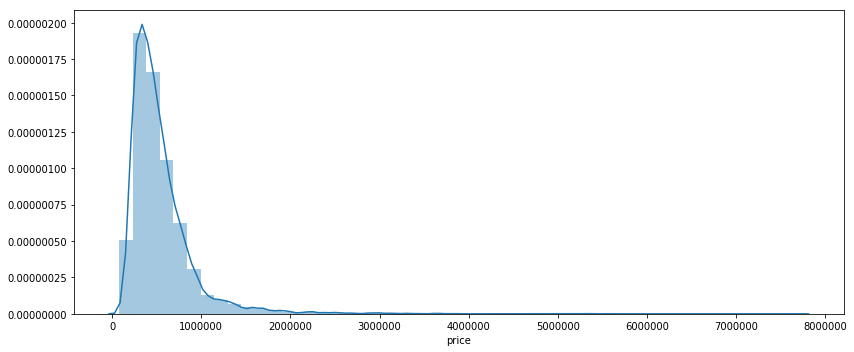

In [7]:
plt.figure(figsize=(12,5))
sns.distplot(train['price'], )
plt.tight_layout()

* Target variable이 왼쪽으로 많이 쏠려있다. scaling을 생각해봐야겠다. 아니면 log변환

# Feature Engieering을 위해 Train, Test dataset을 임시로 합치기.

In [8]:
train = train.assign(is_train = True)
test = test.assign(is_train = False)

In [9]:
total = pd.concat([train, test], sort=False ) #sort를 꼭 False로 해야 column이 자동으로 sort되는 것을 방지할 수 있다.

In [10]:
# 날짜 변환(yyyymmdd로)
total['date'] = total['date'].map(lambda x : x[:8])

In [11]:
total.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_train
0,0,20141013,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,True
1,1,20150225,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,True
2,2,20150218,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,True
3,3,20140627,257500.00,3,2.25,1715,6819,2.00,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819,True
4,4,20150115,291850.00,3,1.50,1060,9711,1.00,0,0,3,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711,True


In [12]:
total[total['is_train']==True].isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
is_train         0
dtype: int64

In [13]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 22 columns):
id               21503 non-null int64
date             21503 non-null object
price            15035 non-null float64
bedrooms         21503 non-null int64
bathrooms        21503 non-null float64
sqft_living      21503 non-null int64
sqft_lot         21503 non-null int64
floors           21503 non-null float64
waterfront       21503 non-null int64
view             21503 non-null int64
condition        21503 non-null int64
grade            21503 non-null int64
sqft_above       21503 non-null int64
sqft_basement    21503 non-null int64
yr_built         21503 non-null int64
yr_renovated     21503 non-null int64
zipcode          21503 non-null int64
lat              21503 non-null float64
long             21503 non-null float64
sqft_living15    21503 non-null int64
sqft_lot15       21503 non-null int64
is_train         21503 non-null bool
dtypes: bool(1), float64(5), int64(15), object

In [14]:
categorical_col_list= []
for i in total.columns.tolist():
    if train[i].nunique() < 10:
        categorical_col_list.append(i)
print(categorical_col_list)

['floors', 'waterfront', 'view', 'condition', 'is_train']


In [15]:
categorical_col_list.append('date')

In [16]:
numeric_list = set(train.columns.tolist()) - set(categorical_col_list)
numeric_list =  list(numeric_list)

In [17]:
numeric_list

['sqft_above',
 'zipcode',
 'yr_renovated',
 'id',
 'lat',
 'yr_built',
 'price',
 'sqft_living15',
 'sqft_lot',
 'grade',
 'long',
 'bathrooms',
 'sqft_lot15',
 'sqft_basement',
 'bedrooms',
 'sqft_living']

In [18]:
vis_list = numeric_list
vis_list.remove('long')
vis_list.remove('lat')
vis_list.remove('grade')


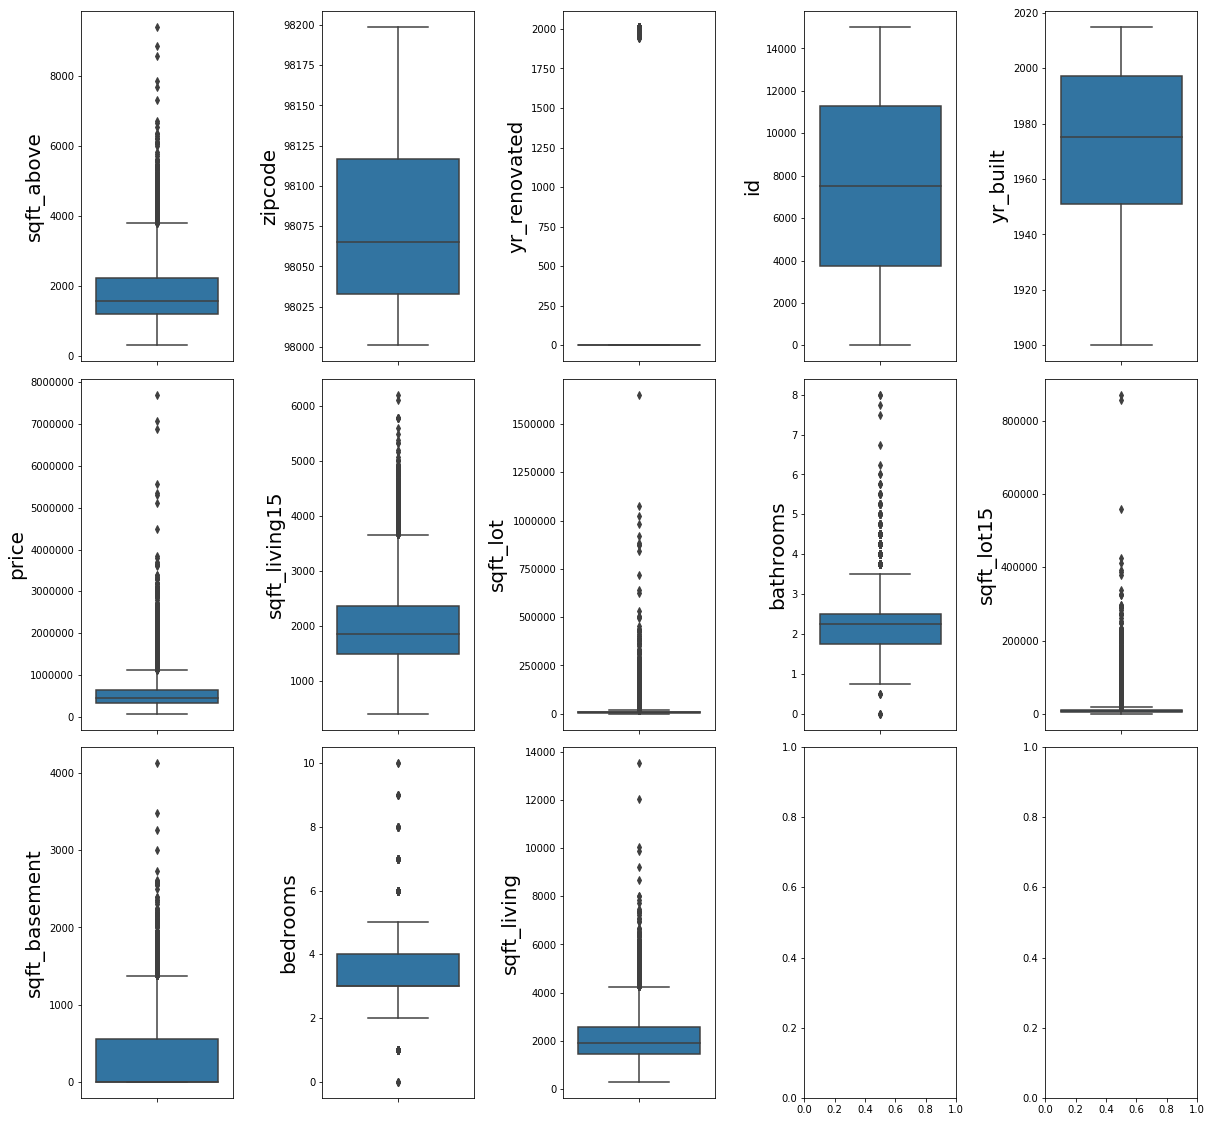

In [19]:
rows = 3
num_col = numeric_list.copy()
if((((len(num_col) + 1) // rows) % rows) == 0): 
    cols = (len(num_col)+1) // rows
else:
    cols = ((len(num_col)+1) // rows) + ((len(num_col) // rows) % rows)

fig, axs = plt.subplots(rows, cols, figsize=(20,20))
fig.subplots_adjust(hspace = 0.05, wspace=0.59)
axs = axs.ravel()
for j,k in enumerate(num_col):
    b = sns.boxplot(y = k, data=train,ax = axs[j],)
    b.set_ylabel(k,fontsize=20)

## 1. sqft_living, sqft_lot <<===>> sqft_living15, sqft_lot15
* 차이 변수 만들어봐야할 듯

## 2. bedrooms > 30이상 확인 후 이상치 처리필요
## -> testset에 있었음

In [20]:
# 리노베이션 여부 0, 1로 변경
total['yr_renovated'] = total['yr_renovated'].map(lambda x : 1 if x != 0 else 0)

In [21]:
total['living_diff'] = total['sqft_living15'] - total['sqft_living']
total['lot_idff'] = total['sqft_lot15'] - total['sqft_lot']

In [22]:
len(total[total['living_diff'] < 0 ])

9803

In [23]:
total.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_train,living_diff,lot_idff
0,0,20141013,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,True,160,0
1,1,20150225,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,True,1950,-1938
2,2,20150218,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,True,120,-577
3,3,20140627,257500.00,3,2.25,1715,6819,2.00,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819,True,523,0
4,4,20150115,291850.00,3,1.50,1060,9711,1.00,0,0,3,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711,True,590,0


In [24]:
data_one = pd.get_dummies(total, prefix=['grade'], columns=['grade'])

In [25]:
total = data_one.copy()

# MODELING

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [27]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 35 columns):
id               21503 non-null int64
date             21503 non-null object
price            15035 non-null float64
bedrooms         21503 non-null int64
bathrooms        21503 non-null float64
sqft_living      21503 non-null int64
sqft_lot         21503 non-null int64
floors           21503 non-null float64
waterfront       21503 non-null int64
view             21503 non-null int64
condition        21503 non-null int64
sqft_above       21503 non-null int64
sqft_basement    21503 non-null int64
yr_built         21503 non-null int64
yr_renovated     21503 non-null int64
zipcode          21503 non-null int64
lat              21503 non-null float64
long             21503 non-null float64
sqft_living15    21503 non-null int64
sqft_lot15       21503 non-null int64
is_train         21503 non-null bool
living_diff      21503 non-null int64
lot_idff         21503 non-null int64
grade_1 

In [28]:
total = total.drop(['id'],axis =1)
train_ = total[total['is_train']==True]
test_ = total[total['is_train']!=True]

In [29]:
train_ = train_.drop('is_train', axis=1)
test_ = test_.drop('is_train', axis=1)

In [30]:
X = train_.drop(columns=['price'])
y = train_['price']

## Train set 예측
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10524, 32)
(10524,)
(4511, 32)
(4511,)


In [31]:
rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [32]:
# Fitting the model
import time
from datetime import datetime
print(datetime.today())       #현재 날짜 가져오기
start_vect=time.time()
#===============================================================
rf.fit(X_train, y_train)
#===============================================================
print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

2019-04-16 13:18:26.823469
training Runtime: 0.37 Minutes


### Feature Importance

In [33]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = X_train.columns
ds_feature_importance["Importance"] = rf.feature_importances_
#ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance=ds_feature_importance.sort_values("Importance", ascending=False)
ds_feature_importance.round(3)

,Feature,Importance
3,sqft_living,0.56
14,lat,0.16
15,long,0.07
16,sqft_living15,0.04
9,sqft_above,0.02
6,waterfront,0.02
7,view,0.01
4,sqft_lot,0.01
18,living_diff,0.01
11,yr_built,0.01


In [34]:
test_.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,living_diff,lot_idff,grade_1,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,20141209,nan,3,2.25,2570,7242,2.00,0,0,3,2170,400,1951,1,98125,47.72,-122.32,1690,7639,-880,397,0,0,0,0,0,1,0,0,0,0,0,0
1,20141209,nan,4,3.00,1960,5000,1.00,0,0,5,1050,910,1965,0,98136,47.52,-122.39,1360,5000,-600,0,0,0,0,0,0,1,0,0,0,0,0,0
2,20140512,nan,4,4.50,5420,101930,1.00,0,0,3,3890,1530,2001,0,98053,47.66,-122.00,4760,101930,-660,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20150415,nan,3,1.00,1780,7470,1.00,0,0,3,1050,730,1960,0,98146,47.51,-122.34,1780,8113,0,643,0,0,0,0,0,1,0,0,0,0,0,0
4,20150312,nan,3,2.50,1890,6560,2.00,0,0,3,1890,0,2003,0,98038,47.37,-122.03,2390,7570,500,1010,0,0,0,0,0,1,0,0,0,0,0,0


In [35]:
test_ = test_.drop(columns=['price'], axis = 1)

In [36]:
y_pred = rf.predict(test_)

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)

print('MSE : {:,.6f}'.format(np.sqrt(mse)))

ValueError: Found input variables with inconsistent numbers of samples: [6468, 4511]

In [38]:
sub = pd.read_csv('../input/sample-submission/sample_submission.csv')

In [39]:
sub['price'] = y_pred

In [40]:
sub.head()

,id,price
0,15035,469491.20
1,15036,487631.11
2,15037,1256763.98
3,15038,294295.26
4,15039,325141.21


In [41]:
sub.to_csv('./first_submission.csv', index=False)